# ⚡️study by 석민⚡️

In [1]:
import pandas as pd
import numpy as np
import os

In [3]:
os.getcwd()

'/Users/seokminlee/Desktop/mose/zero-base/스터디노트/4주차'

# Beautiful Soup 기초와 웹데이터

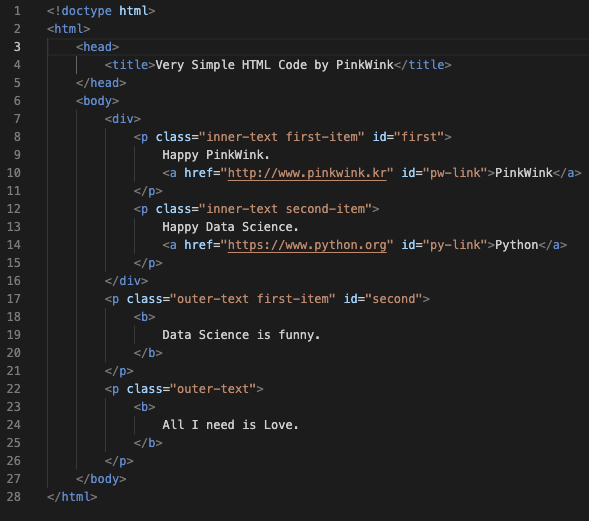

- 파일로 저장된 html 파일을 읽을 때
- open : 파일명과 함께 읽기(r) / 쓰기(w) 속성을 지정
- html.parser : Beautiful Soup의 html을 읽는 엔진 중 하나(lxml도 많이 사용) 
- prettify() : html 출력을 이쁘게 만들어 주는 기능

In [2]:
from bs4 import BeautifulSoup

In [3]:
page = open("../ds_study/unit3/data/03. test_first.html", "r").read()
soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<!DOCTYPE html>
<html>
 <head>
  <title>
   Very Simple HTML Code by PinkWink
  </title>
 </head>
 <body>
  <div>
   <p class="inner-text first-item" id="first">
    Happy PinkWink.
    <a href="http://www.pinkwink.kr" id="pw-link">
     PinkWink
    </a>
   </p>
   <p class="inner-text second-item">
    Happy Data Science.
    <a href="https://www.python.org" id="py-link">
     Python
    </a>
   </p>
  </div>
  <p class="outer-text first-item" id="second">
   <b>
    Data Science is funny.
   </b>
  </p>
  <p class="outer-text">
   <b>
    All I need is Love.
   </b>
  </p>
 </body>
</html>



In [92]:
soup.body()

[<div>
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>
 </div>,
 <p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <a href="https://www.python.org" id="py-link">Python</a>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <b>
                 Data Science is funny.
             </b>,
 <p class="outer-text">
 <b>
                 All I n

In [4]:
soup.head()

[<title>Very Simple HTML Code by PinkWink</title>]

In [5]:
soup.find("p")

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

### 📍 find_all( )
- 지정된 태그를 모두 찾아준다

In [6]:
soup.find_all("p")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>,
 <p class="inner-text second-item">
                 Happy Data Science.
                 <a href="https://www.python.org" id="py-link">Python</a>
 </p>,
 <p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [7]:
soup.find_all(class_ = "outer-text")

[<p class="outer-text first-item" id="second">
 <b>
                 Data Science is funny.
             </b>
 </p>,
 <p class="outer-text">
 <b>
                 All I need is Love.
             </b>
 </p>]

In [10]:
# 이렇게 사용하는 경우가 많다.
soup.find_all(id = "first")

[<p class="inner-text first-item" id="first">
                 Happy PinkWink.
                 <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
 </p>]

In [12]:
# HTML 내에서 속성 id는 딱 한 번만 나타난다
# 그래서 find_all() 함수는 의미가 없다
# 단, 검색결과를 list로 받고 싶다면 id라도 find_all() 함수를 사용한다
soup.find(id = "first")

<p class="inner-text first-item" id="first">
                Happy PinkWink.
                <a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>
</p>

### 응용

In [31]:
for each_tag in soup.find_all("p"):
    print("-"*40)
#     print(each_tag.text) 와 같음
    print(each_tag.get_text())

----------------------------------------

                Happy PinkWink.
                PinkWink


                Happy PinkWink.
                PinkWink

----------------------------------------

                Happy Data Science.
                Python


                Happy Data Science.
                Python

----------------------------------------


                Data Science is funny.
            



                Data Science is funny.
            

----------------------------------------


                All I need is Love.
            



                All I need is Love.
            



In [19]:
links = soup.find_all("a")
links

[<a href="http://www.pinkwink.kr" id="pw-link">PinkWink</a>,
 <a href="https://www.python.org" id="py-link">Python</a>]

In [23]:
for each in links:
    href = each["href"] # each.get("href")
    text = each.string
    print(f"{text} -> {href}")

PinkWink -> http://www.pinkwink.kr
Python -> https://www.python.org


# 크롬 개발자 도구 이용하기

In [24]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

In [32]:
# 웹주소(URL)에 접근할 때는 urllib의 request 모듈이 필요하다
url = "https://finance.naver.com/marketindex/"
page = urlopen(url)

soup = BeautifulSoup(page, "html.parser")
print(soup.prettify())

<script language="javascript" src="/template/head_js.naver?referer=info.finance.naver.com&amp;menu=marketindex&amp;submenu=market">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/js/info/jindo.min.ns.1.5.3.euckr.js" type="text/javascript">
</script>
<script src="https://ssl.pstatic.net/imgstock/static.pc/20230803180530/js/jindo.1.5.3.element-text-patch.js" type="text/javascript">
</script>
<div id="container" style="padding-bottom:0px;">
 <div class="market_include">
  <div class="market_data">
   <div class="market1">
    <div class="title">
     <h2 class="h_market1">
      <span>
       환전 고시 환율
      </span>
     </h2>
    </div>
    <!-- data -->
    <div class="data">
     <ul class="data_lst" id="exchangeList">
      <li class="on">
       <a class="head usd" href="/marketindex/exchangeDetail.naver?marketindexCd=FX_USDKRW" onclick="clickcr(this, 'fr1.usdt', '', '', event);">
        <h3 class="h_lst">
         <span class="blind">
          미국 U

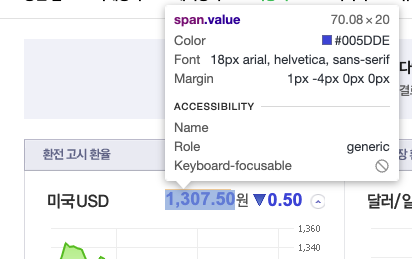

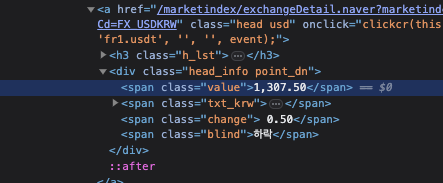

In [33]:
soup.find_all("span", "value")

[<span class="value">1,307.50</span>,
 <span class="value">920.48</span>,
 <span class="value">1,437.73</span>,
 <span class="value">181.65</span>,
 <span class="value">142.3400</span>,
 <span class="value">1.1001</span>,
 <span class="value">1.2767</span>,
 <span class="value">101.8300</span>,
 <span class="value">82.82</span>,
 <span class="value">1688.98</span>,
 <span class="value">1976.1</span>,
 <span class="value">81398.14</span>]

In [38]:
soup.find_all("span", "value")[0].string

'1,307.50'

In [35]:
# 같은 메소드
print(soup.find_all("span", {"class":"value"})[0].text)
print(soup.find_all("span", {"class":"value"})[0].string)
print(soup.find_all("span", {"class":"value"})[0].get_text())

1,307.50
1,307.50
1,307.50


# 위키 백과 문서 정보 가져오기

In [81]:
import urllib
from urllib.request import urlopen, Request

html = "https://ko.wikipedia.org/wiki/{search_words}"
req = Request(html.format(search_words = urllib.parse.quote("여명의_눈동자")))

response = urlopen(req)

soup = BeautifulSoup(response, "html.parser")

soup

<!DOCTYPE html>

<html class="client-nojs vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled" dir="ltr" lang="ko">
<head>
<meta charset="utf-8"/>
<title>여명의 눈동자 - 위키백과, 우리 모두의 백과사전</title>
<script>document.documentElement.className="client-js vector-feature-language-in-header-enabled vector-feature-language-in-main-page-header-disabled vector-feature-sticky-header-disabled vector-feature-page-tools-pinned-disabled vector-feature-toc-pinned-enabled vector-feature-main-menu-pinned-disabled vector-feature-limited-width-enabled vector-feature-limited-width-content-enabled vector-feature-zebra-design-disabled";(function(){var cookie=document.cookie.match(/(?:^|; )kowikimwclientp

In [82]:
n = 0
for each in soup.find_all("ul"):
    print("=>" + str(n) + "="*40)
    print(each)
    n += 1

=>0========================================
<ul class="vector-menu-content-list"><li class="mw-list-item" id="n-mainpage-description"><a accesskey="z" href="/wiki/%EC%9C%84%ED%82%A4%EB%B0%B1%EA%B3%BC:%EB%8C%80%EB%AC%B8" title="대문으로 가기 [z]"><span>대문</span></a></li><li class="mw-list-item" id="n-recentchanges"><a accesskey="r" href="/wiki/%ED%8A%B9%EC%88%98:%EC%B5%9C%EA%B7%BC%EB%B0%94%EB%80%9C" title="위키의 최근 바뀐 목록 [r]"><span>최근 바뀜</span></a></li><li class="mw-list-item" id="n-currentevents"><a href="/wiki/%ED%8F%AC%ED%84%B8:%EC%9A%94%EC%A6%98_%ED%99%94%EC%A0%9C" title="최근의 소식 알아 보기"><span>요즘 화제</span></a></li><li class="mw-list-item" id="n-randompage"><a accesskey="x" href="/wiki/%ED%8A%B9%EC%88%98:%EC%9E%84%EC%9D%98%EB%AC%B8%EC%84%9C" title="무작위로 선택된 문서 불러오기 [x]"><span>임의의 문서로</span></a></li><li class="mw-list-item" id="n-sitesupport"><a href="//donate.wikimedia.org/wiki/Special:FundraiserRedirector?utm_source=donate&amp;utm_medium=sidebar&amp;utm_campaign=C13_ko.wikipedia.org&amp;usela

In [83]:
soup.find_all("ul")[5].text

'기여토론'

In [84]:
soup.find_all("ul")[15].text.strip().replace("\xa0", "").replace("\n", "")

''

# list 데이터형

- List 형은 대괄호로 생성한다.
- List 형을 반복문(for)에서 사용하는 방법이 다른 언어에 비해 편하다.

In [58]:
colors = ["red", "green", "blue"]
for color in colors:
    print(color)

red
green
blue


- in 명령으로 조건문 (if)에 적용하느 것도 역시 다른 명령에 비해 편하다.

In [59]:
if "blue" in colors:
    print(True)

True


In [60]:
movies = ["그린 북", "가버나움", "디지몬 어드벤처 라스트 에볼루션: 인연", "먼 훗날 우리"]

### list.append( )
- list 제일 뒤에 하나 추가한다.

In [61]:
movies.append("윈더")
print(movies)

['그린 북', '가버나움', '디지몬 어드벤처 라스트 에볼루션: 인연', '먼 훗날 우리', '윈더']


### list.pop( )
- list 제일 뒤 자료를 지운다.

In [62]:
movies.pop()
print(movies)

['그린 북', '가버나움', '디지몬 어드벤처 라스트 에볼루션: 인연', '먼 훗날 우리']


### list.extend( )
- list 제일 뒤 다수의 자료를 추가한다.

In [63]:
movies.extend(["베일리 어겐", "아일라", "당갈"])
print(movies)

['그린 북', '가버나움', '디지몬 어드벤처 라스트 에볼루션: 인연', '먼 훗날 우리', '베일리 어겐', '아일라', '당갈']


### list.remove( )
- list에서 같은 이름의 자료를 지운다.

In [64]:
movies.remove("가버나움")
print(movies)

['그린 북', '디지몬 어드벤처 라스트 에볼루션: 인연', '먼 훗날 우리', '베일리 어겐', '아일라', '당갈']


### Slicing
- [n:m] n 번째 부터 m-1까지

In [65]:
movies[2:5]

['먼 훗날 우리', '베일리 어겐', '아일라']

### list.insert( )
- 원하는 위치에 자료를 삽입한다.

In [67]:
movies.insert(2, 1000)
print(movies)

['그린 북', '디지몬 어드벤처 라스트 에볼루션: 인연', 1000, '먼 훗날 우리', '베일리 어겐', '아일라', '당갈']


### list 안에 list를 가질 수 있다.

In [68]:
movies.insert(3, ["비고 모텐슨", "마허샬라 알리", "린다 카델리니"])
print(movies)

['그린 북', '디지몬 어드벤처 라스트 에볼루션: 인연', 1000, ['비고 모텐슨', '마허샬라 알리', '린다 카델리니'], '먼 훗날 우리', '베일리 어겐', '아일라', '당갈']


### instance( )
- isinstance()는 Python의 내장 함수로, 주어진 객체가 주어진 클래스 또는 데이터 타입의 인스턴스인지를 검사합니다. - 이 함수는 객체의 타입을 확인할 때 유용하게 사용됩니다.
~~~python
isinstance(object, classinfo)
~~~
- object: 타입을 확인하고자 하는 객체.
- classinfo: 단일 클래스 또는 데이터 타입, 또는 클래스 또는 데이터 타입의 튜플.

In [70]:
isinstance(movies, list)

True

In [71]:
isinstance(movies, int)

False

In [72]:
# 여러 타입과의 비교 가능
isinstance(movies, (int, list))

True

- 결론적으로, isinstance()는 객체의 타입을 안전하게 확인하거나, 객체가 여러 가능한 타입 중 하나에 속하는지 검사할 때 매우 유용합니다.

In [ ]:

다음 중 selenium 에 대해 틀린 설명은?
1. 동적 페이지에 접근해서 정보를 가져오고자 할 때 사용할 수 있다
2. 현재 크롬 전용으로 사용된다

In [ ]:
다음 중 파이썬에서 쌍따옴표(")와 따옴표(')와 세 개 연달아 사용하는 따옴표(''')에 대한 설명으로 틀린 것은?
1. 따옴표 안의 문자열에 쌍따옴표가 있으면 안된다
2. 쌍따옴표 안의 문자열에 따옴표가 있을 수 있다
3. 셋 연달아 사용하는 따옴표는 그 안에 쌍따옴표나 따옴표가 다 올 수 있다
4. 셋 연달아 사용하는 따옴표는 줄 바꿈도 포함될 수 있다